# Wine Quality Data

## 1. Setting up the environment

In [1]:
import numpy as np # for numerical operations
import pandas as pd # for data manipulation

# To ingore warnings
import warnings
warnings.filterwarnings('ignore')

# In read_csv() function, we have to pass the file path of the dataset
# The data is separated by ';', not by ',' so we use sep=';'
red_wine_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Wine_Dataset/winequality-red.csv", sep=";")

## 2. Initial Review of the Data

### a. Head of the Data

In [3]:
red_wine_data.head() # Display the first 5 rows of the dataset
# red_wine_data.tail() # Display the last 5 rows of the dataset

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

### b. Shape of the Data

In [4]:
red_wine_data.shape # Returns the number of rows and columns in the dataset

(1599, 12)

### c. Get a Statistical Overview using Describe

In [10]:
red_wine_data.describe() # Returns a statistical overview of the dataset

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

### d. Observations
- Here as you can notice the median value is less than the mean value of each column (except for quality). The Median is represented by 50%(50th percentile) in the index column.This signifies the presence of Outliers. For example for intuition, let's imagine a data set includes values: 2, 4, 6, 30. The mean value: 10.5, which is lower than the median of the data (5), is greatly affected by the extreme data point(30).
如您所见，中位数值小于每个列的均值（质量列除外）。中位数在索引列中表示为 50%（第 50 个百分位数）。这表明存在异常值。例如，为了直观理解，让我们想象一个数据集包含值：2，4，6，30。均值：10.5，这低于数据的中位数（5），受到极端数据点（30）的极大影响。
- There is notably a large difference between 75th %tile and max values of predictors “residual sugar”, ” free sulfur dioxide”, ” total sulfur dioxide”. This indicates that some values of these 3 variables lie much farther from the general range of values( up to 75th %tile)
在预测变量“残糖”、“游离二氧化硫”和“总二氧化硫”的 75 分位数和最大值之间存在显著差异。这表明这三个变量的某些值远高于一般范围（高达 75 分位数）。
- Thus, the observations 1 and 2 suggest that there are extreme values i.e Outliers in our dataset.
因此，观察 1 和 2 表明我们的数据集中存在极端值，即离群点。

## 3. Exploring the Features

### a. Unique Values of Quality(Target Variable)

In [7]:
red_wine_data['quality'].unique() # 返回目标变量'quality'的唯一值

### b. Frequency Counts of each Quality Value


In [8]:
red_wine_data['quality'].value_counts() # 返回目标变量'quality'的频率计数

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

### c. Renaming Columns
- renam() function is used to rename the columns of the DataFrame.

In [9]:
red_wine_data.rename(columns={
    'fixed acidity': 'fixed_acidity',
    'citric acid': 'citric_acid',
    'volatile acidity': 'volatile_acidity',
    'residual sugar': 'residual_sugar',
    'free sulfur dioxide': 'free_sulfur_dioxide',
    'total sulfur dioxide': 'total_sulfur_dioxide'
}, inplace=True) # inplace=True means that the changes will be applied to the original DataFrame

## 4. Checking for Missing Values
- Handling missing values is an essential part of the data cleaning and preparation process because almost all data in real life comes with some missing values.
处理缺失值是数据清洗和准备过程中的一个重要部分，因为现实生活中几乎所有的数据都存在缺失值。

- Pandas provides isnull(), isna() functions to detect missing values. Both of them do the same thing.
Pandas 提供了 isnull()和 isna()函数来检测缺失值。这两个函数的作用相同。

- df.isna() returns the dataframe with boolean values indicating missing values.
df.isna()返回一个包含布尔值的 DataFrame，指示缺失值的位置。
- You can also choose to use notna() which is just the opposite of isna().
你也可以选择使用 notna()，它与 isna()正好相反。
- df.isna().any() returns a boolean value for each column. If there is at least one missing value in that column, the result is True.
df.isna().any() 对每一列返回一个布尔值。如果该列中至少有一个缺失值，结果为 True。
- df.isna().sum() returns the number of missing values in each column.
df.isna().sum() 对每一列返回缺失值的数量。

### a. isna() / isnull()

In [17]:
red_wine_data.isnull().sum() # Returns the number of missing values in each column

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### b. info()
- df.info 返回关于数据框的信息，包括每列的数据类型、每列中的空值数量以及整个数据框的内存使用情况。

In [19]:
red_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## 5. Checking for Duplicates
- Duplicates might or might not affect the quality of data. Before deciding if they should be removed, it is essential to understand why they might have occurred in the first place.
重复项可能会或可能不会影响数据质量。在决定是否应该删除它们之前，了解它们最初可能发生的原因至关重要。

In [25]:
duplicate_entries = red_wine_data[red_wine_data.duplicated()] # 把判断为True的行存储在duplicate_entries中
duplicate_entries.shape # Returns the number of duplicate entries in the DataFrame

(240, 12)

## 6. Part 1-5 Exercise

In [32]:
exam_score_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/exam_scores.csv", sep=',') # Load the exam scores dataset

exam score data head: 
exam score data shap: 


(1000, 8)

In [35]:
exam_score_data.head()

gender race/ethnicity parental level of education         lunch  \
0    male        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2    male        group C                some college  free/reduced   
3  female        group D           bachelor's degree  free/reduced   
4    male        group D                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          74             68             67  
1               completed          58             68             66  
2                    none          66             65             65  
3                    none          74             75             73  
4                    none          78             77             71

In [34]:
print("exam score data shap: ")
exam_score_data.shape

exam score data shap: 


(1000, 8)

In [36]:
exam_score_data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [37]:
exam_score_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [39]:
exam_score_data['math score'].unique() # Returns the unique values of the 'exam_score' column

array([ 74,  58,  66,  78,  75,  69,  54,  65,  87,  64,  44,  57,  40,
        52,  82,  49,  37,  61,  73,  86,  48,  60,  76,  55,  72,  36,
        83,  70,  80,  56,  91,  67,  53,  77,  81,  89,  51,  96,  88,
        63,  71,  68,  38,  79,  90,  47,  33, 100,  42,  45,  62,  46,
        31,  59,  84,  94,  85,  92,  50,  34,  39,  43,  95,  93,  30,
        28,  35,  25,  97,  99,  98,  18,  23,  15])

In [40]:
exam_score_data['math score'].value_counts()

math score
63    35
61    32
62    32
76    30
60    29
      ..
30     1
35     1
18     1
23     1
15     1
Name: count, Length: 74, dtype: int64

In [41]:
exam_score_data['reading score'].isnull().mean() # Returns the mean of the 'reading score' column, which is the percentage of missing values

np.float64(0.0)

## 7. Data Visualization

### a. Importing Libraries

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

### b. Separating Input and Target Variables

In [43]:
y = red_wine_data.quality # Target variable
x = red_wine_data.drop('quality', axis=1) # All other columns except 'quality' are input variables

### c. Histogram 直方图
- Difference between a histogram and a bar chart:
  - A histogram is used to represent the **distribution** of numerical data, while a bar chart is used to represent **categorical** data.
  - In a histogram, the x-axis represents the **range of values**, while in a bar chart, the x-axis represents the **categories**.

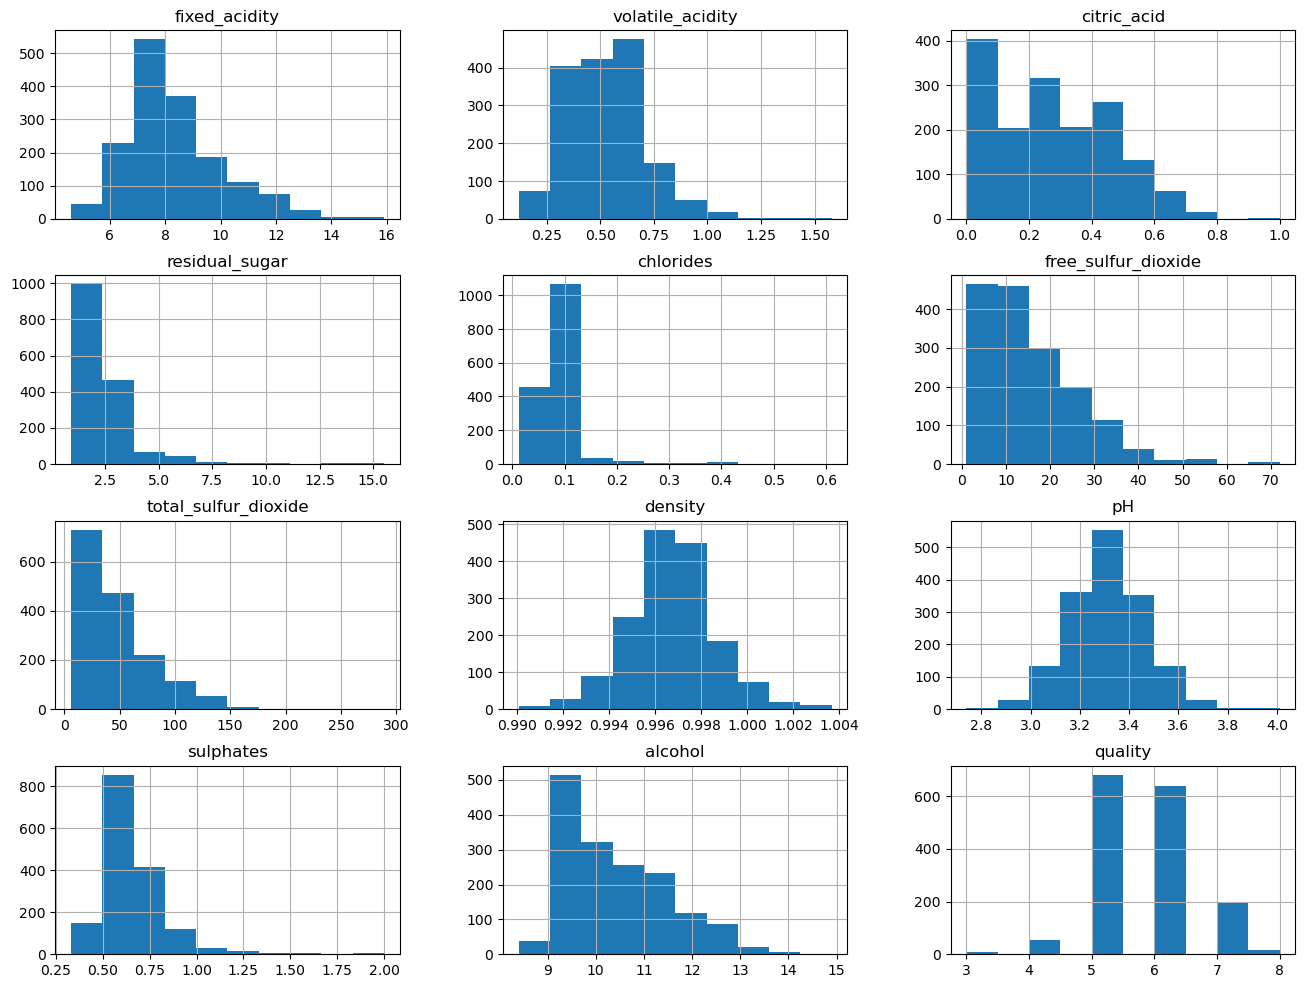

In [47]:
red_wine_data.hist(bins=10, figsize=(16, 12)) # Plotting a histogram of the 'quality' column
plt.show()

### d. Correlation Matrix with Heatmap 带有热图的相关矩阵
Correlation is a statistical measure. Data correlation is a way to understand the relationship between multiple values or features in your dataset.
相关性是一种统计指标。数据相关性是理解数据集中多个值或特征之间关系的一种方法。

Every single successful data science project revolves around finding accurate correlations between the input and target variables. However more than often, we oversee how crucial correlation analysis is.
每个成功的项目都围绕着在输入和目标变量之间找到准确的相关性。然而，我们往往忽视了相关性分析的重要性。

It is recommended to perform correlation analysis before and after data gathering and transformation phases of a data science project.
建议在数据科学项目的数据收集和转换阶段之前和之后进行相关性分析。

 There are three different types of correlations:
存在三种不同类型的相关性：

- Positive Correlation: Two features (variables) can be positively correlated with each other. It means that when the value of one variable increases then the value of the other variable(s) also increases (also decreases when the other decreases).
正相关：两个特征（变量）可以相互正相关。这意味着当一个变量的值增加时，另一个变量的值也会增加（反之亦然，当另一个变量减少时也会减少）。
Eg. The more time you spend running on a treadmill, the more calories you will burn.
例如。你在跑步机上跑步的时间越长，燃烧的卡路里就越多。
- Negative Correlation: Two features (variables) can be negatively correlated with each other. This occurs when the value of one variable increases and the value of another variable(s) decreases (inversely proportional).
负相关：两个特征（变量）可以相互负相关。当其中一个变量的值增加时，另一个变量的值会减少（成反比）。
Eg. As the weather gets colder, air conditioning costs decrease.
例如。天气越冷，空调费用就越低。
- No Correlation: Two features might not have any relationship with each other. This happens when the value of a variable is changed then the value of the other variable is not impacted.
无相关性：两个特征之间可能没有任何关系。这种情况发生在变量的值发生变化时，另一个变量的值不受影响。
Eg. There is no relationship between the amount of tea drunk and level of intelligence.
例如。喝茶的量与智力水平之间没有关系。


- Each of these correlation types exists in a spectrum represented by values from -1 to +1 where slight or high positive correlation features can be like 0.5 or 0.7.
这些相关性类型都存在于一个从-1 到+1 表示的范围内，轻微或高度正相关特征可以是 0.5 或 0.7。
- A very strong and perfect positive correlation is represented by a correlation score of 0.9 or 1.
非常强和完美的正相关由 0.9 或 1 的相关性分数表示。
- If there is a strong negative correlation, it will be represented by a value of -0.9 or -1. Values close to zero indicates no correlation.
如果有强负相关性，它将表示为-0.9 或-1。接近零的值表示没有相关性。
We can check how each feature is related to others using corr() function.
我们可以使用 corr()函数检查每个特征与其他特征的关系。

In [48]:
red_wine_data.corr() # Returns the correlation matrix of the DataFrame

fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000         -0.256131     0.671703   
volatile_acidity          -0.256131          1.000000    -0.552496   
citric_acid                0.671703         -0.552496     1.000000   
residual_sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free_sulfur_dioxide       -0.153794         -0.010504    -0.060978   
total_sulfur_dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity               0.114777   0.093705            -0.153794   
volatile_acidity            0.001918   0.061298            -0.010504   
citric_acid                 0.143577   0.203823            -0.060978   
residual_sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free_sulfur_dioxide         0.187049   0.005562             1.000000   
total_sulfur_dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total_sulfur_dioxide   density        pH  sulphates  \
fixed_acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile_acidity                  0.076470  0.022026  0.234937  -0.260987   
citric_acid                       0.035533  0.364947 -0.541904   0.312770   
residual_sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free_sulfur_dioxide               0.667666 -0.021946  0.070377   0.051658   
total_sulfur_dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed_acidity        -0.061668  0.124052  
volatile_acidity     -0.202288 -0.390558  
citric_acid           0.109903  0.226373  
residual_sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free_sulfur_dioxide  -0.069408 -0.050656  
total_sulfur_dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

<Axes: >

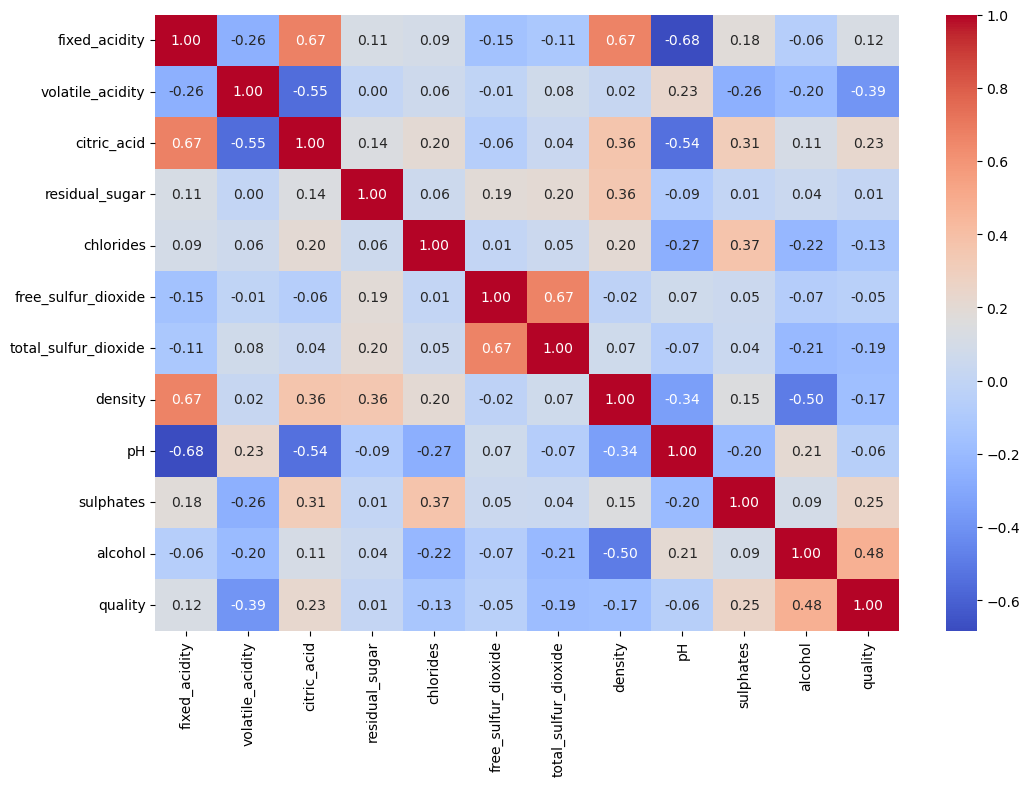

In [50]:
plt.figure(figsize=(12, 8))
sns.heatmap(red_wine_data.corr(), annot=True, cmap='coolwarm', fmt='.2f') # Plotting a heatmap of the correlation matrix

### e. Count Plot 计数图
- The variable quality is categorical in nature and we can visualize these types of variables using barplot or countplot.
变量质量是分类性质的，我们可以使用条形图或计数图来可视化这类变量。

- Count plot is a graphical display to show the number of occurrences or frequency for each categorical data using bars.
计数图是一种图形显示方式，用于使用条形图展示每个分类数据的出现次数或频率。

<Axes: xlabel='quality', ylabel='count'>

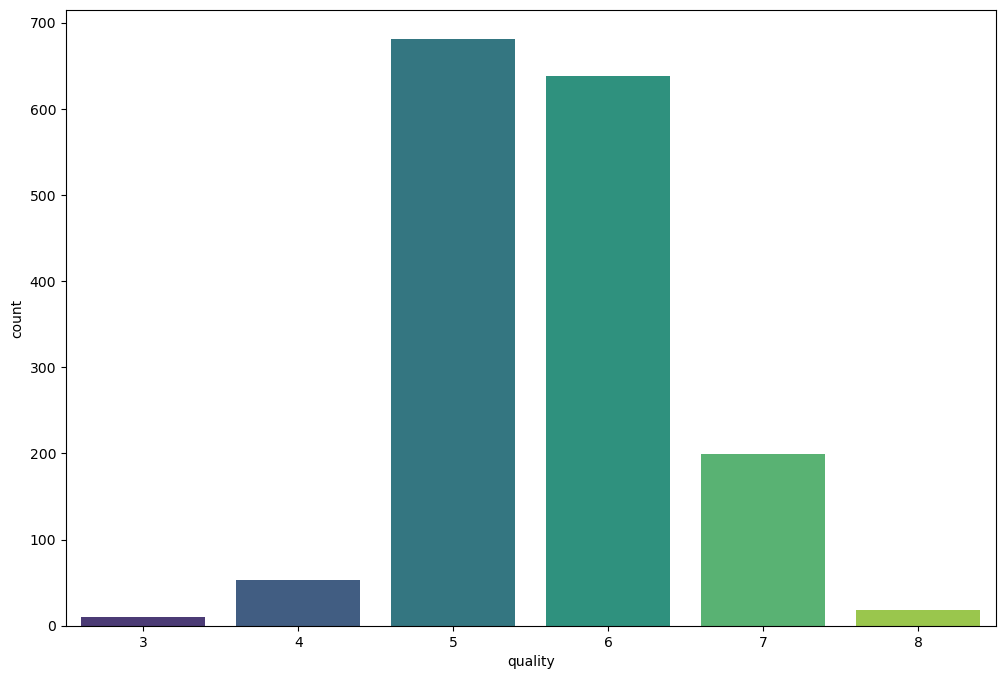

In [57]:
plt.figure(figsize=(12, 8))
sns.countplot(x='quality', data=red_wine_data, palette='viridis') # Plotting a count plot of the 'quality' column

### f. Pair Plot 配对图
- The pair plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.
配对图基于两个基本图形，直方图和散点图。对角线上的直方图让我们能够看到单个变量的分布，而上下三角形中的散点图则显示了两个变量之间的关系（或缺乏关系）。

- It plots every numerical attribute against every other.
它将每个数值属性与其他每个属性进行绘制。

- pairplot function of seaborn helps to achieve this
seaborn 库的 pairplot 函数可以帮助实现这一点。

<Figure size 1600x1200 with 0 Axes>

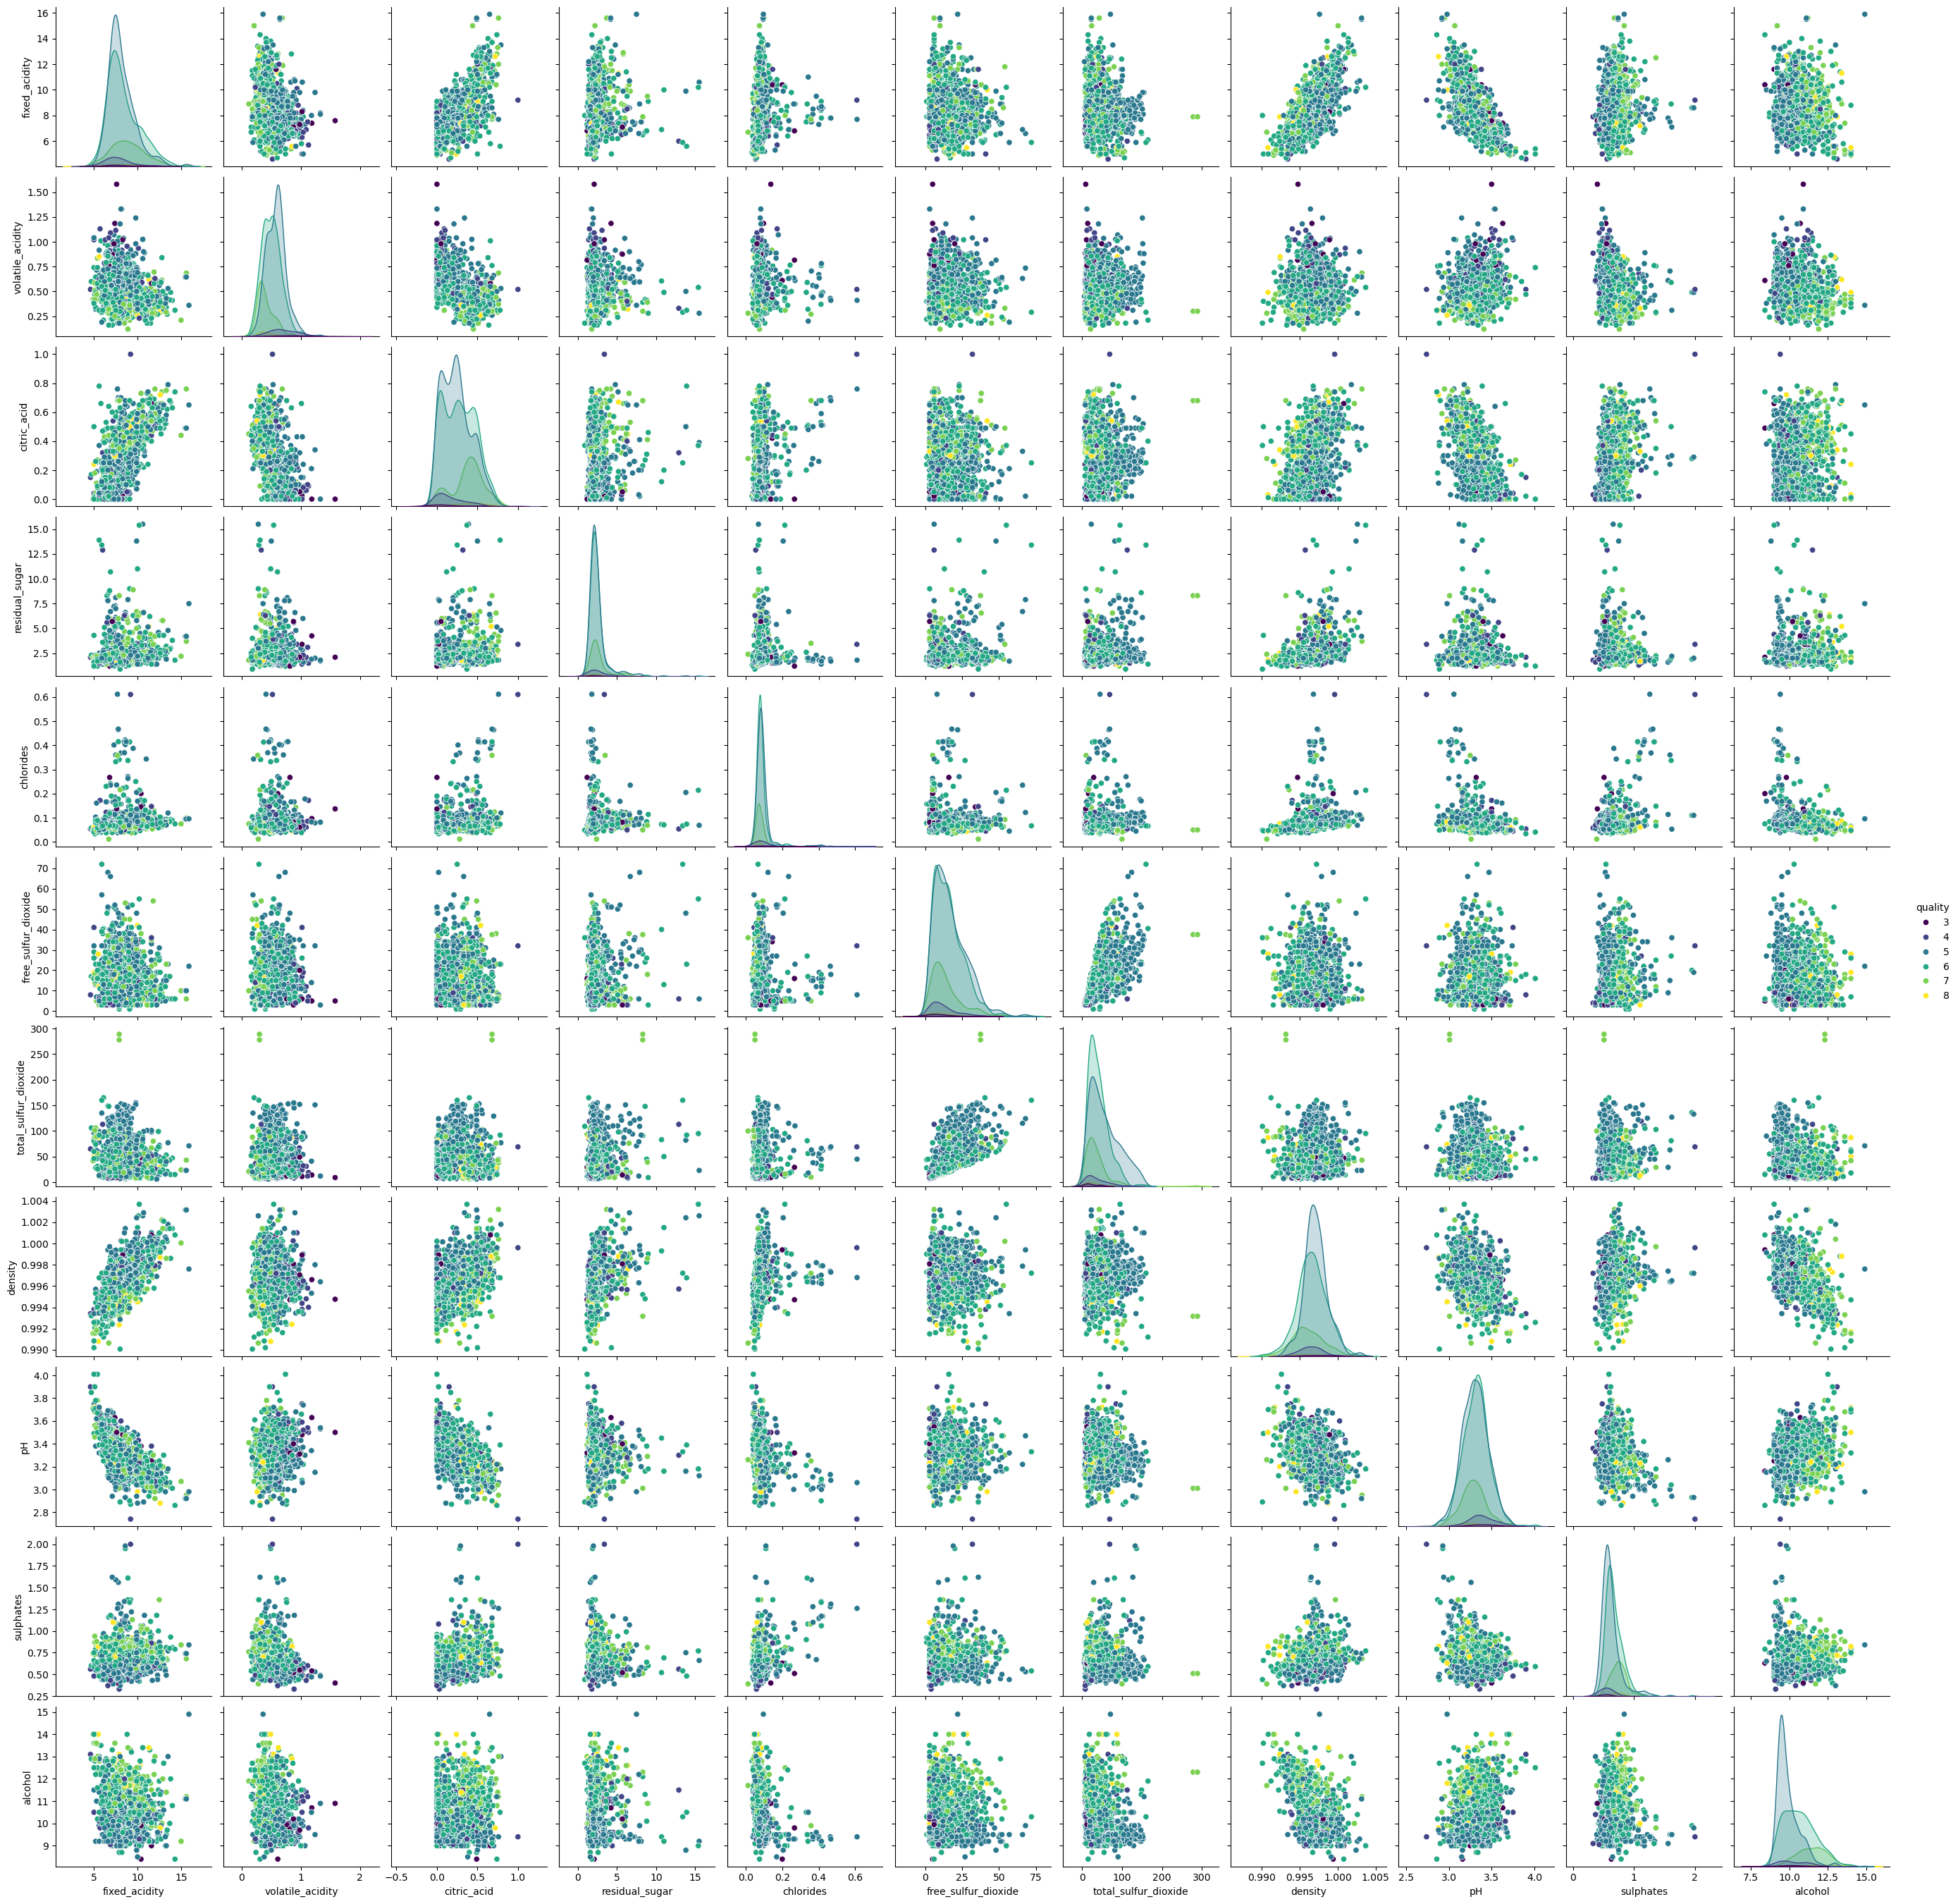

In [59]:
sns.pairplot(red_wine_data, hue='quality', palette='viridis') # Plotting a pair plot of the DataFrame

### g. Box Plot 箱线图
- A box plot is a great way to get a visual sense of an entire range of data. It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.
箱线图是直观了解数据全范围的好方法。它能告诉你异常值及其数值，还能显示数据是否对称、数据聚集的紧密程度，以及数据是否倾斜及其倾斜方式。

- Box plots divides data into its quartiles. The “box” shows a user the data set between the first and third quartiles.
箱线图将数据分为四个分位数。箱体显示了第一分位数和第三分位数之间的数据集。

- The median gets drawn somewhere inside the box and then you see the most extreme non-outliers to finish the plot. Those lines are known as the “whiskers”. If there are any outliers then those can be plotted as well.
中位数会画在箱体内部某处，然后你看到最极端的非异常值来完成图形。这些线被称为“须线”。如果有异常值，也可以将它们绘制出来。

- With box plots you can answer how diverse or uniform your data might be. You can identify what is normal and what is extreme. Box plots help give a shape to your data that is broad without sacrificing the ability to look at any piece and ask more questions.
通过箱线图，你可以判断数据的多样性或统一性。你可以识别什么是正常值，什么是极端值。箱线图帮助为数据赋予形状，既保持了对任何部分进行深入探究的能力，又不会牺牲数据的整体性。

- It displays the five-number summary of a set of data. The five-number summary is:
它显示了一组数据的五数概括。五数概括包括：

minimum  最小值
first quartile (Q1)  第一四分位数（Q1）
median  中位数
third quartile (Q3)  第三四分位数（Q3）
maximum  最大值

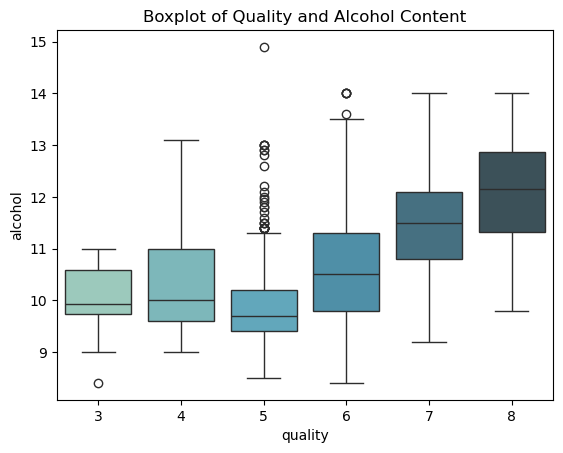

In [60]:
sns.boxplot(x=red_wine_data.quality, y=red_wine_data.alcohol, palette='GnBu_d')
plt.title('Boxplot of Quality and Alcohol Content')
plt.show()

## 8. EDA (Exploratory Data Analysis) Exercise

In [62]:
# importing the dataset
titanic_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/First_ML_Model/master/titanic.csv', sep=',')

In [63]:
# Displaying the first 5 rows of the dataset
titanic_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [75]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [64]:
# Missing values in the dataset
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [68]:
titanic_data['Sex'].value_counts() # Returns the frequency counts of each unique

Sex
male      577
female    314
Name: count, dtype: int64

In [73]:
titanic_data['Survived'].mean() # Returns the mean of the 'Survived' column, which is the percentage of missing values

np.float64(0.3838383838383838)

In [74]:
titanic_data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [83]:
titanic_data[titanic_data['Sex'] == 'male']['Survived'].mean()

np.float64(0.18890814558058924)

In [84]:
titanic_data[titanic_data['Sex'] == 'female']['Survived'].mean()

np.float64(0.7420382165605095)

In [87]:
titanic_data['Pclass'].value_counts() # Returns the frequency counts of each unique value in the 'Pclass' column

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [95]:
titanic_data[titanic_data['Pclass'] == 1]['Survived'].mean()

np.float64(0.6296296296296297)

In [96]:
titanic_data[titanic_data['Pclass'] == 2]['Survived'].mean()

np.float64(0.47282608695652173)

In [97]:
titanic_data[titanic_data['Pclass'] == 3]['Survived'].mean()

np.float64(0.24236252545824846)

In [98]:
titanic_data[titanic_data['Age'] <= 18]['Survived'].mean()

np.float64(0.5035971223021583)

In [99]:
titanic_data[titanic_data['Age'] > 18]['Survived'].mean()

np.float64(0.3826086956521739)

In [100]:
titanic_data[titanic_data['Embarked'] == 'S']['Survived'].value_counts()

Survived
0    427
1    217
Name: count, dtype: int64

In [101]:
titanic_data['Fare'].nlargest(5)

258    512.3292
679    512.3292
737    512.3292
27     263.0000
88     263.0000
Name: Fare, dtype: float64

In [104]:
titanic_data['Name'].nunique()

891

In [105]:
titanic_data['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<Axes: >

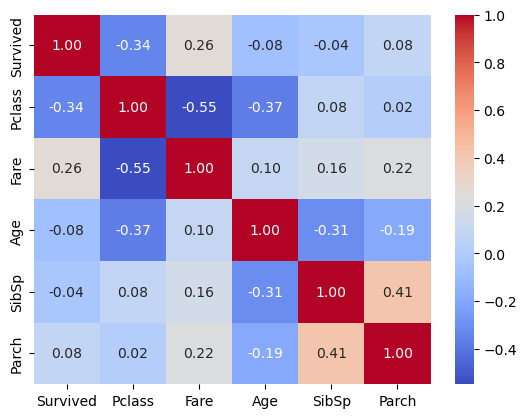

In [119]:
cols = ['Survived', 'Pclass', 'Fare', 'Age', 'SibSp', 'Parch']
corr_matrix = titanic_data[cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f') # Plotting a heatmap of the correlation matrix